## Project Defination
The competition is simple: we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

## Data
There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). 

The values in the second column ("Survived") can be used to determine whether each passenger survived or not:

* if it's a "1", the passenger survived.
* if it's a "0", the passenger died.

For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

**test.csv**
Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.
Note that test.csv does not have a "Survived" column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition!

The **gender_submission.csv** file is provided as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypotheses regarding survival will probably be different, which will lead to a different submission file. But, just like this file, your submission should have:

* a "PassengerId" column containing the IDs of each passenger from test.csv.
* a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

## features

* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Note: 
sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)
<!--  -->
parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Importing libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import catboost
from catboost import CatBoostClassifier

from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import confusion_matrix

## Loading in the data

In [32]:
train_df = pd.read_csv("../data/titanic/train.csv")
test_df = pd.read_csv("../data/titanic/test.csv")

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train_df["Survived"].value_counts().sum()

891

In [35]:
train_df.shape

(891, 12)

In [36]:
train_df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### we will check data with some plots

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

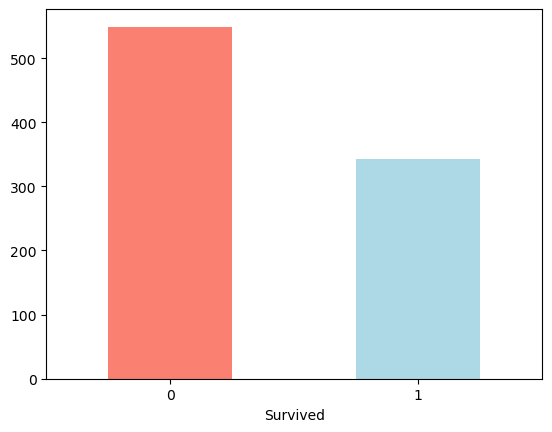

In [38]:
train_df.Survived.value_counts().plot(kind="bar",color=["salmon", "lightblue"])
plt.xticks(rotation=0)

<Axes: ylabel='Frequency'>

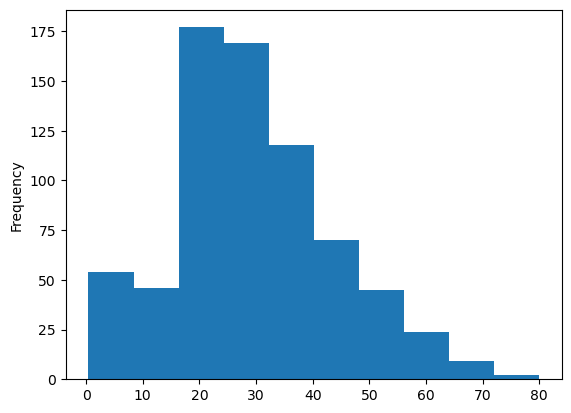

In [39]:
train_df.Age.plot.hist()

## comparing the features

compare with target (Survived) with pclass,sex,age

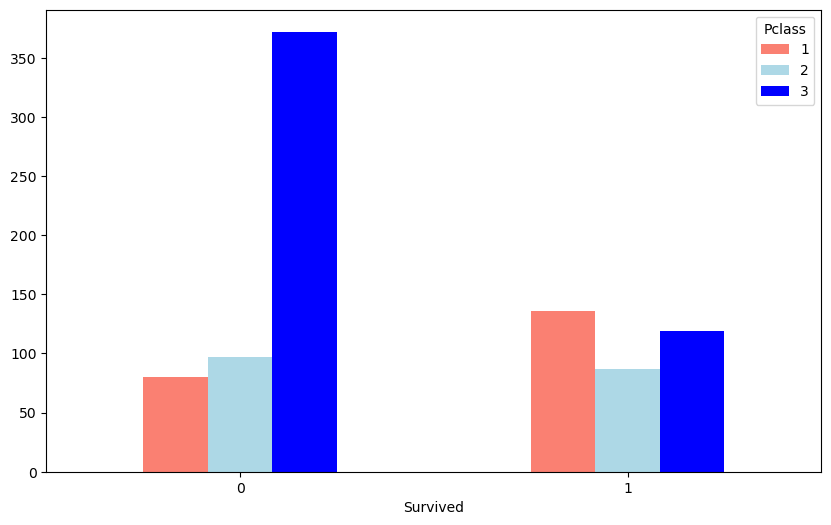

In [40]:
pd.crosstab(train_df.Survived,train_df.Pclass).plot(kind = "bar",
                                                   figsize=(10,6),
                                                    color=["salmon", "lightblue","blue"])
plt.xticks(rotation=0);

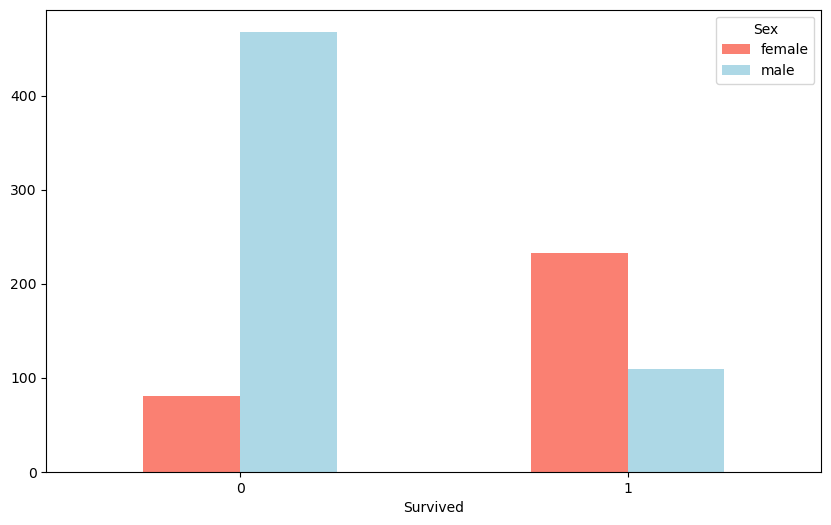

In [41]:
pd.crosstab(train_df.Survived,train_df.Sex).plot(kind = "bar",
                                                   figsize=(10,6),
                                                    color=["salmon", "lightblue","blue"])
plt.xticks(rotation=0);

In [42]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
train_df.drop("Name",axis=1,inplace=True)

In [44]:
train_df["Sex"]=train_df.Sex.map({"male":0,"female":1})

In [45]:
train_df.drop("Ticket",axis=1,inplace=True)

In [46]:
train_df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [47]:
train_df.drop("Cabin",axis=1,inplace=True)

In [48]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [50]:
train_df.fillna({"Age":train_df["Age"].median()},inplace=True)
train_df.fillna({"Embarked":"S"},inplace=True)

In [51]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [52]:
# Create a new feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,1
2,3,1,3,1,26.0,0,0,7.9250,S,0
3,4,1,1,1,35.0,1,0,53.1000,S,1
4,5,0,3,0,35.0,0,0,8.0500,S,0


In [54]:
train_df.drop(columns=["SibSp","Parch"],inplace=True)

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,7.2500,S,1
1,2,1,1,1,38.0,71.2833,C,1
2,3,1,3,1,26.0,7.9250,S,0
3,4,1,1,1,35.0,53.1000,S,1
4,5,0,3,0,35.0,8.0500,S,0


In [64]:
X= train_df.drop("Survived",axis=1)
Y = train_df["Survived"]

In [57]:
X.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,3,0,22.0,7.2500,S,1
1,2,1,1,38.0,71.2833,C,1
2,3,3,1,26.0,7.9250,S,0
3,4,1,1,35.0,53.1000,S,1
4,5,3,0,35.0,8.0500,S,0


In [58]:
categorical_features= ["Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [
        ("one_hot",one_hot,categorical_features)
    ],
    remainder= "passthrough"
)

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.    ,  0.    ,  1.    , ..., 22.    ,  7.25  ,  1.    ],
       [ 1.    ,  0.    ,  0.    , ..., 38.    , 71.2833,  1.    ],
       [ 0.    ,  0.    ,  1.    , ..., 26.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ..., 28.    , 23.45  ,  3.    ],
       [ 1.    ,  0.    ,  0.    , ..., 26.    , 30.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    , ..., 32.    ,  7.75  ,  0.    ]])

In [59]:
X= transformed_X

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier(n_jobs=-1,
                              random_state= 42)
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [62]:
model.score(X_test,y_test)

0.8268156424581006

Now we will check the data for test data

In [242]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [243]:
test_df["Sex"] = test_df.Sex.map({"male": 0, "female": 1})
test_df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
test_df.fillna({"Age": train_df["Age"].median(), "Embarked": "S"}, inplace=True)
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

In [244]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,3,0,34.5,0,0,7.8292,Q,0
1,893,3,1,47.0,1,0,7.0000,S,1
2,894,2,0,62.0,0,0,9.6875,Q,0
3,895,3,0,27.0,0,0,8.6625,S,0
4,896,3,1,22.0,1,1,12.2875,S,2


In [245]:
test_df.drop(columns=["SibSp","Parch"],inplace=True)

In [246]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,0,34.5,7.8292,Q,0
1,893,3,1,47.0,7.0000,S,1
2,894,2,0,62.0,9.6875,Q,0
3,895,3,0,27.0,8.6625,S,0
4,896,3,1,22.0,12.2875,S,2


In [247]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
FamilySize     0
dtype: int64

In [248]:
test_df.fillna({"Fare":test_df["Fare"].median()},inplace=True)

In [249]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

In [250]:
categorical_features= ["Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [
        ("one_hot",one_hot,categorical_features)
    ],
    remainder= "passthrough"
)

transformed_test_df = transformer.fit_transform(test_df)
transformed_test_df

array([[ 0.    ,  1.    ,  0.    , ..., 34.5   ,  7.8292,  0.    ],
       [ 0.    ,  0.    ,  1.    , ..., 47.    ,  7.    ,  1.    ],
       [ 0.    ,  1.    ,  0.    , ..., 62.    ,  9.6875,  0.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ..., 38.5   ,  7.25  ,  0.    ],
       [ 0.    ,  0.    ,  1.    , ..., 28.    ,  8.05  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 28.    , 22.3583,  2.    ]])

In [251]:
y_preds = model.predict(transformed_test_df)
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [253]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] = y_preds # our test prediction
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


We need our submission dataframe to look like the gender_submisison dataframe, so we'll turn the Survived column into integers.

In [254]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [255]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [256]:
submission.to_csv('../data/titanic/RandomForest_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
